In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d0 = pd.read_csv('./digit-recognizer/train.csv')
print(d0.head(5))

# save the labels into a variable l
l = d0['label']

#Drop the label features and store the pixel data in d
d = d0.drop("label",axis = 1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [16]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


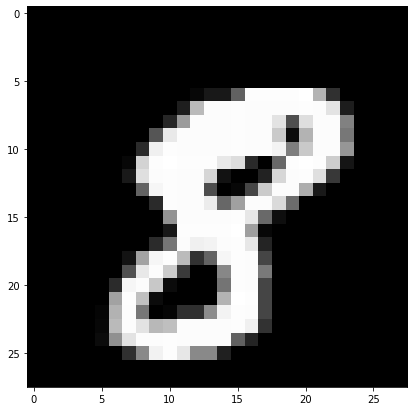

8


In [21]:
# display or plot a number
plt.figure(figsize= (7,7))
idx = 10 #index

#d.iloc get data based on integer location and convert it to matrix and rescale to 28,28
grid_data = d.iloc[idx].to_numpy().reshape(28,28) # reshape from 1d to 2d
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()

print(l[idx])

# 2D Visualization using PCA

In [22]:
# Take only 15000 datas for time efficiency 
labels = l.head(15000)
data = d.head(15000)

print("The shape of the sample data is", data.shape)

The shape of the sample data is (15000, 784)


In [23]:
# Data Preprocessing: Standardizing the data
# Standardizing basically means for every datapoint xi do (xi - mean) / S.D (Mean = 0, S.D = 1)
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [71]:
#find co-variance matrix which is : A^T * A
sample_data = standardized_data

#Matrix Multiplication using numpy array
covar_matrix = np.matmul(sample_data.T , sample_data)

print("The shape of the variance matrix = ",covar_matrix.shape)

The shape of the variance matrix =  (784, 784)


In [72]:
#as we need to reduce dimension to 2d find the top 2 eigen-values and coressponding eigen-vectors
#for projecting onto a 2-D Space

from scipy.linalg import eigh

#The parameter 'eigvals' is defined (low value to high value)
#eigh function will return the eigen values in ascending order
#this code generates only the top 2 (782,783) eigen values.
values,vectors = eigh(covar_matrix,eigvals = (782,783))

print("Shape of eigen vectors = ",vectors.shape)

#converting the eigen vectors into (2,d) shape for easyness
vectors = vectors.T

#Here the vectors[1] represents the eigen vector corresponding 1st principal
#Here the vectors[2] represents the eigen vector corresponding 2nd principal
print("Updated shape of eigen vectors = ",vectors.shape)

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [73]:
#Projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors,sample_data.T)

print("resultant new data points' shape" , vectors.shape , "X" , sample_data.T.shape , "=" 
      , new_coordinates.shape)

resultant new data points' shape (2, 784) X (784, 15000) = (2, 15000)


In [74]:
#vstack means add data to the stack vertically (row)
new_coordinates = np.vstack((new_coordinates , labels)).T

dataFrame = pd.DataFrame(data = new_coordinates , columns = ("1st_principal", "2nd_principal"
                                                            ,"label"))
print(dataFrame.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


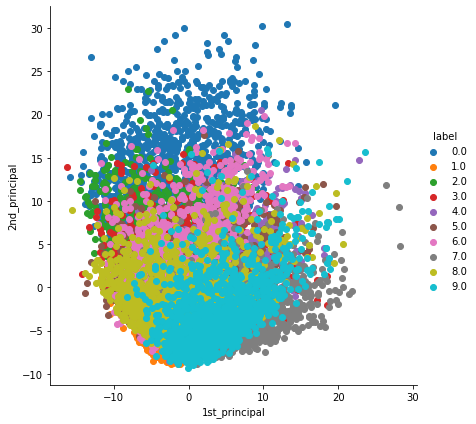

In [75]:
import seaborn as sns
sns.FacetGrid(dataFrame,hue = "label" , height= 6) \
    .map(plt.scatter,'1st_principal','2nd_principal') \
    .add_legend()
plt.show()

# PCA using Scikit-Learn

In [57]:
from sklearn import decomposition
pca = decomposition.PCA()

In [63]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

print("Shape of pca_reduced.shape = ", pca_data.shape)

Shape of pca_reduced.shape =  (15000, 2)


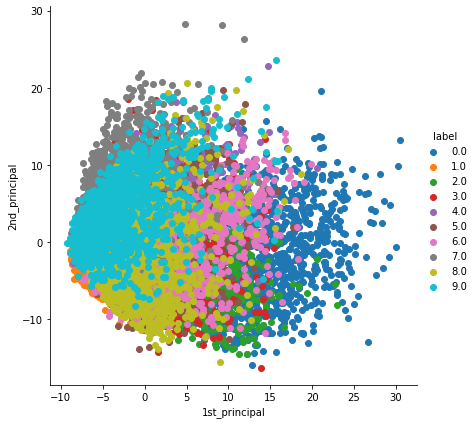

In [64]:
pca_data = np.vstack((pca_data.T , labels)).T

pca_df = pd.DataFrame(data = pca_data, columns = ("1st_principal","2nd_principal","label"))
sns.FacetGrid(pca_df,hue="label",height=6) \
    .map(plt.scatter,'1st_principal','2nd_principal') \
    .add_legend()
plt.show()